# 2D Plotting Functions Examples

This notebook demonstrates the 2D plotting functions available in the `neural_analysis.plotting` module:

- `plot_scatter_2d`: Basic 2D scatter plots with color mapping and variable sizes
- `plot_trajectory_2d`: 2D trajectories with time-based color gradients
- `plot_grouped_scatter_2d`: Grouped scatter plots with optional convex hulls
- `plot_kde_2d`: 2D kernel density estimation plots

Each function supports both matplotlib and plotly backends for flexibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_analysis.plotting import (
    plot_scatter_2d,
    plot_trajectory_2d,
    plot_grouped_scatter_2d,
    plot_kde_2d,
    PlotConfig,
    set_backend
)

# Set random seed for reproducibility
np.random.seed(42)

## 1. Basic 2D Scatter Plot

Simple scatter plot showing 2D points without any color mapping.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/src/neural_analysis/plotting/renderers.py:171: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  return ax.scatter(


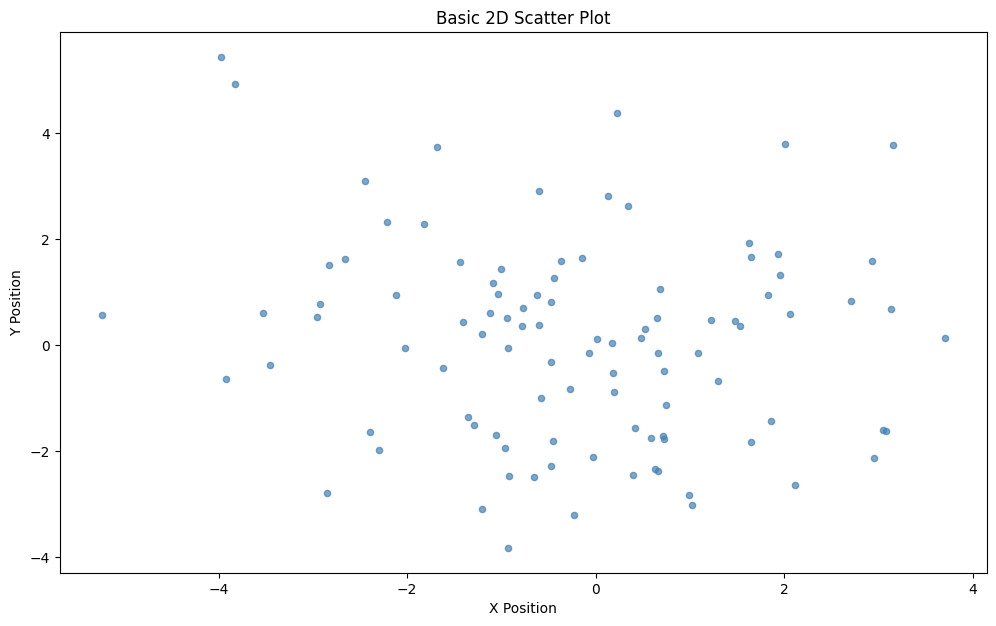

In [2]:
# Generate random 2D points (simulating neural positions)
n_points = 100
x = np.random.randn(n_points) * 2
y = np.random.randn(n_points) * 2

# Create scatter plot
set_backend('matplotlib')
config = PlotConfig(title='Basic 2D Scatter Plot', xlabel='X Position', ylabel='Y Position')
fig = plot_scatter_2d(x, y, colors='steelblue', config=config)
plt.show()

## 2. Scatter Plot with Color Mapping

Scatter plot where points are colored by a continuous value (e.g., firing rate, activation level).

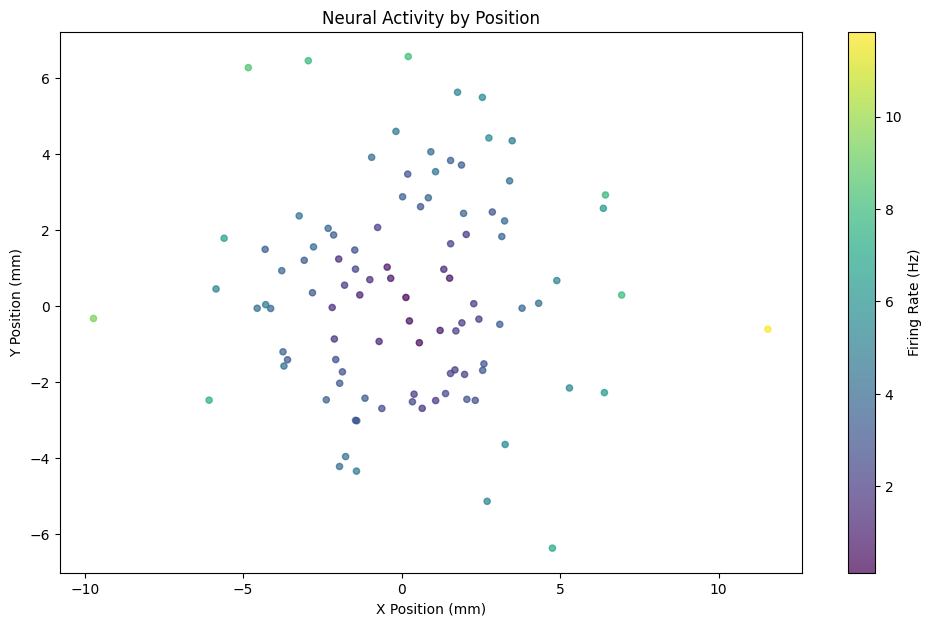

In [3]:
# Generate points with associated values (e.g., firing rates)
x = np.random.randn(100) * 3
y = np.random.randn(100) * 3
firing_rates = np.sqrt(x**2 + y**2) + np.random.randn(100) * 0.5

# Create scatter plot with color mapping
config = PlotConfig(
    title='Neural Activity by Position',
    xlabel='X Position (mm)',
    ylabel='Y Position (mm)'
)
fig = plot_scatter_2d(
    x, y,
    colors=firing_rates,
    cmap='viridis',
    colorbar=True,
    colorbar_label='Firing Rate (Hz)',
    config=config
)
plt.show()

## 3. Scatter Plot with Variable Marker Sizes

Points sized according to a variable (e.g., cell body size, spike amplitude).

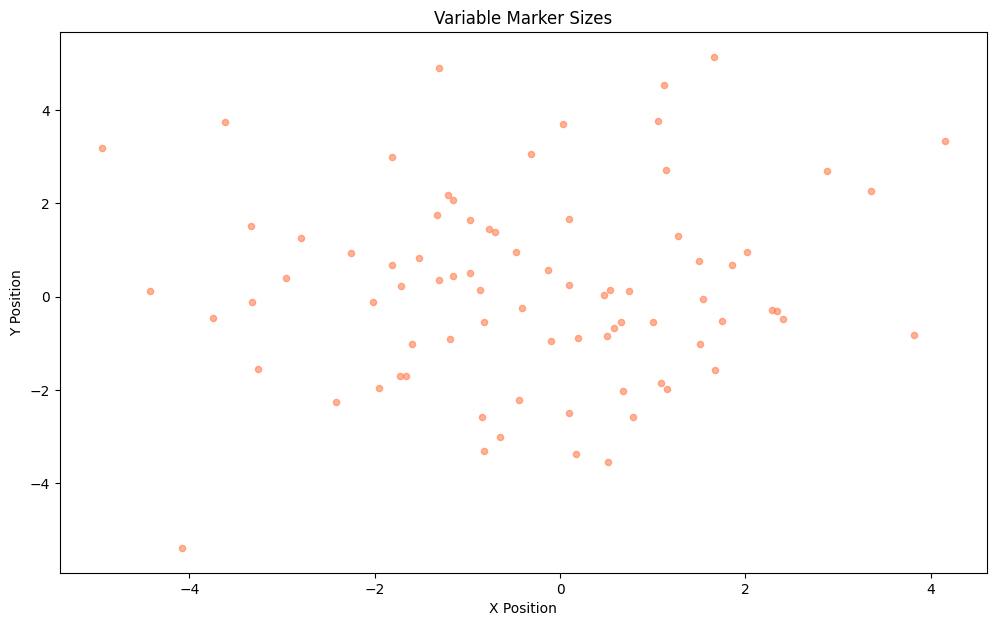

In [4]:
# Generate points with variable sizes
x = np.random.randn(80) * 2
y = np.random.randn(80) * 2
sizes = np.random.uniform(20, 200, 80)  # Variable marker sizes

# Create scatter plot with variable sizes
config = PlotConfig(
    title='Variable Marker Sizes',
    xlabel='X Position',
    ylabel='Y Position'
)
fig = plot_scatter_2d(
    x, y,
    colors='coral',
    sizes=sizes,
    alpha=0.6,
    config=config
)
plt.show()

## 4. 2D Trajectory with Time-Based Coloring

Visualize a trajectory path with colors indicating progression over time.

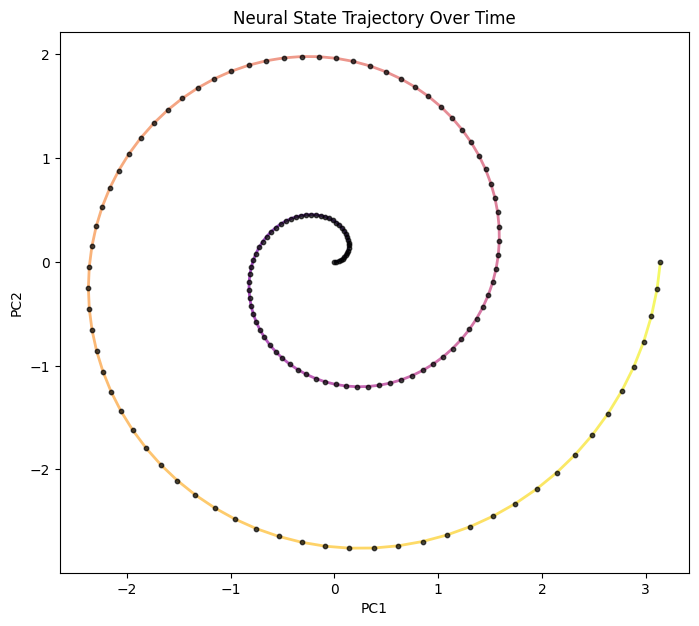

In [5]:
# Generate a spiral trajectory (simulating neural state evolution)
t = np.linspace(0, 4 * np.pi, 150)
x_traj = t * np.cos(t) / 4
y_traj = t * np.sin(t) / 4

# Plot trajectory with time-based colors
config = PlotConfig(
    title='Neural State Trajectory Over Time',
    xlabel='PC1',
    ylabel='PC2'
)
fig = plot_trajectory_2d(
    x_traj, y_traj,
    color_by="time",
    cmap='plasma',
    linewidth=2,
    show_points=True,
    config=config
)
plt.show()

## 5. Trajectory with Custom Styling

Trajectory without points, using custom line width and color.

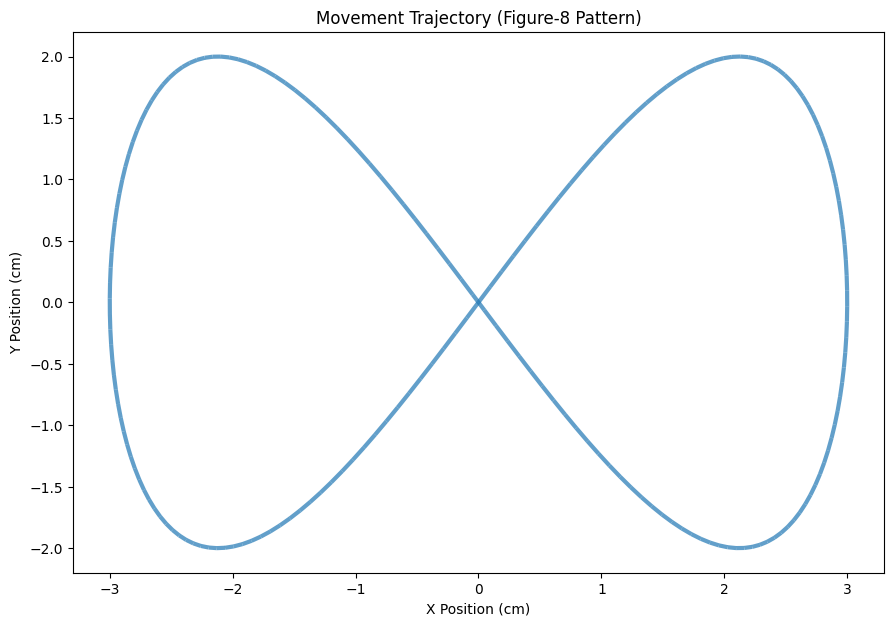

In [6]:
# Generate a figure-8 trajectory
t = np.linspace(0, 2 * np.pi, 200)
x_traj = np.sin(t) * 3
y_traj = np.sin(2 * t) * 2

# Plot trajectory without time-based colors
config = PlotConfig(
    title='Movement Trajectory (Figure-8 Pattern)',
    xlabel='X Position (cm)',
    ylabel='Y Position (cm)'
)
fig = plot_trajectory_2d(
    x_traj, y_traj,
    color_by=None,
    linewidth=3,
    show_points=False,
    config=config
)
plt.show()

## 6. Grouped Scatter Plot with Convex Hulls

Visualize multiple groups with different colors and optional convex hull boundaries.

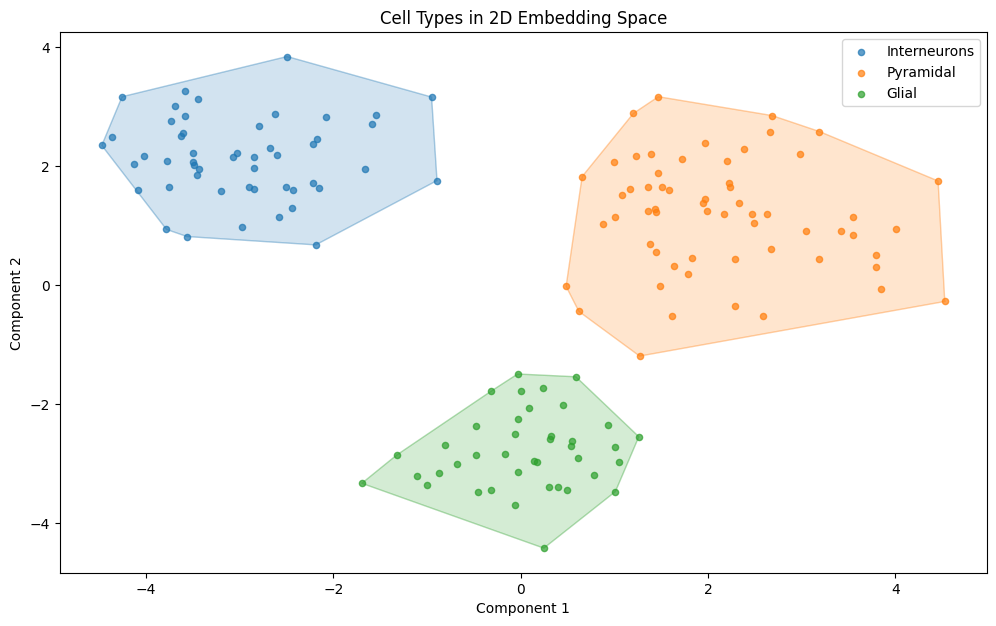

In [7]:
# Generate three clusters (simulating different cell types)
group1_x = np.random.randn(50) * 0.8 - 3
group1_y = np.random.randn(50) * 0.8 + 2

group2_x = np.random.randn(60) * 1.0 + 2
group2_y = np.random.randn(60) * 1.0 + 1

group3_x = np.random.randn(40) * 0.7 + 0
group3_y = np.random.randn(40) * 0.7 - 3

# Create grouped data dictionary (dict of (x, y) tuples)
grouped_data = {
    'Interneurons': (group1_x, group1_y),
    'Pyramidal': (group2_x, group2_y),
    'Glial': (group3_x, group3_y)
}

# Plot with convex hulls
config = PlotConfig(
    title='Cell Types in 2D Embedding Space',
    xlabel='Component 1',
    ylabel='Component 2'
)
fig = plot_grouped_scatter_2d(
    grouped_data,
    show_hulls=True,
    config=config
)
plt.show()

## 7. 2D Kernel Density Estimation

Show the density distribution of 2D data using KDE with filled contours.

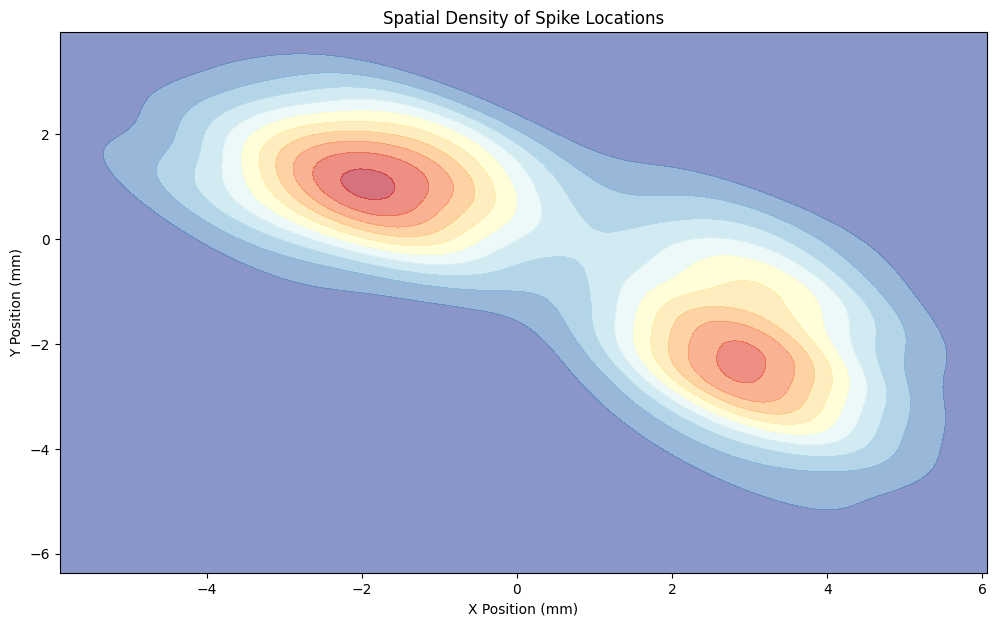

In [8]:
# Generate bimodal distribution (two peaks)
n = 150
x_kde = np.concatenate([
    np.random.randn(n) * 1.0 - 2,
    np.random.randn(n) * 0.8 + 3
])
y_kde = np.concatenate([
    np.random.randn(n) * 0.8 + 1,
    np.random.randn(n) * 1.2 - 2
])

# Plot KDE with filled contours
config = PlotConfig(
    title='Spatial Density of Spike Locations',
    xlabel='X Position (mm)',
    ylabel='Y Position (mm)'
)
fig = plot_kde_2d(
    x_kde, y_kde,
    cmap='RdYlBu_r',
    fill=True,
    show_points=False,
    config=config
)
plt.show()

## 8. KDE with Overlaid Scatter Points

Combine KDE density contours with the actual data points.

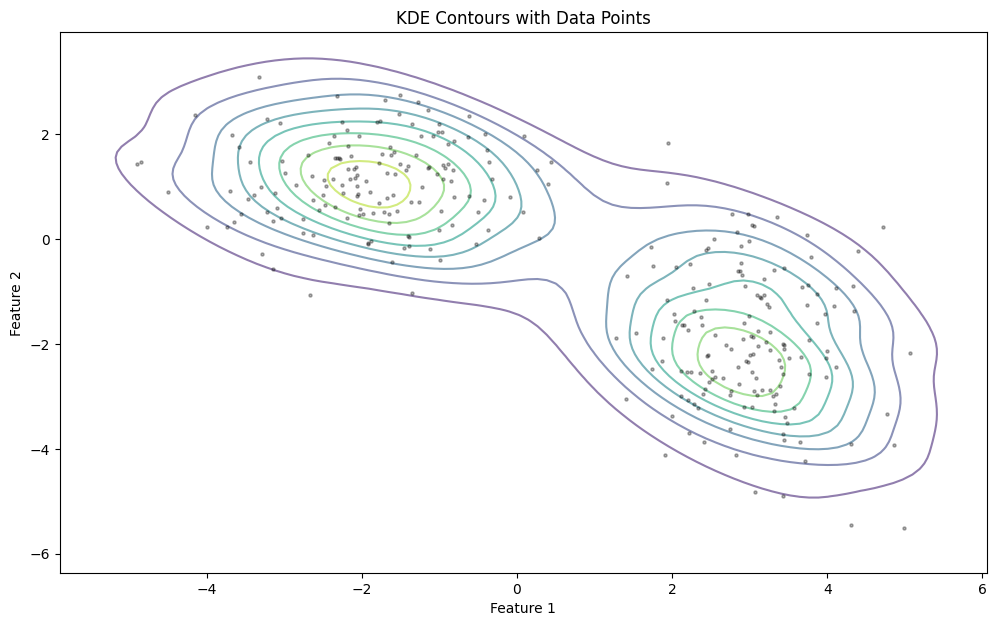

In [9]:
# Use same bimodal data
config = PlotConfig(
    title='KDE Contours with Data Points',
    xlabel='Feature 1',
    ylabel='Feature 2'
)
fig = plot_kde_2d(
    x_kde, y_kde,
    cmap='viridis',
    fill=False,  # Use contour lines only
    show_points=True,
    n_levels=8,
    config=config
)
plt.show()

## 9. Comparing Matplotlib and Plotly Backends

The same plot rendered with both backends for comparison. Plotly provides interactive features like zooming and hovering.

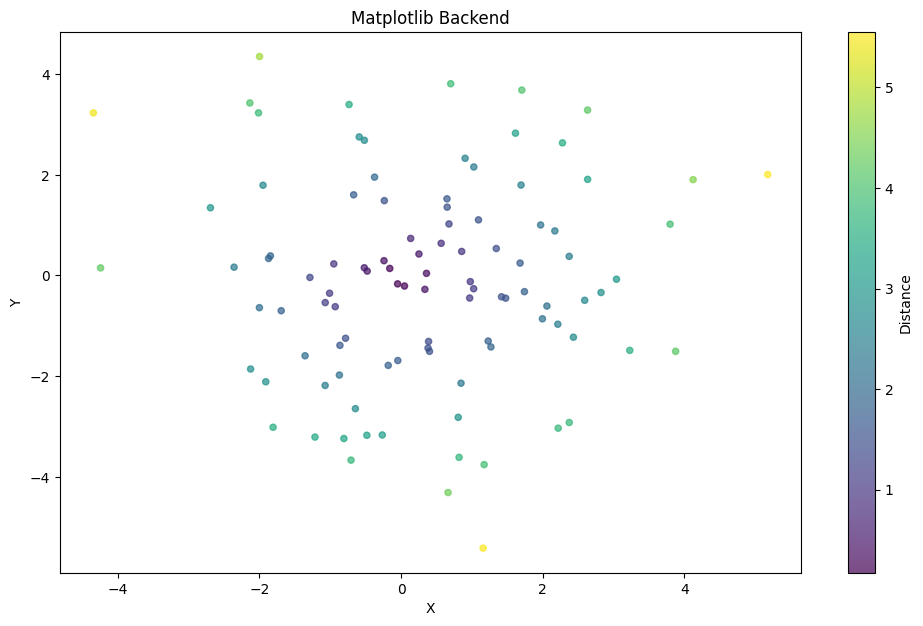

In [10]:
# Generate sample data
x = np.random.randn(100) * 2
y = np.random.randn(100) * 2
colors_data = np.sqrt(x**2 + y**2)

# Matplotlib version
set_backend('matplotlib')
config_mpl = PlotConfig(
    title='Matplotlib Backend',
    xlabel='X',
    ylabel='Y'
)
fig_mpl = plot_scatter_2d(
    x, y,
    colors=colors_data,
    colorbar=True,
    colorbar_label='Distance',
    config=config_mpl
)
plt.show()

# Plotly version (interactive)
set_backend('plotly')
config_plotly = PlotConfig(
    title='Plotly Backend (Interactive)',
    xlabel='X',
    ylabel='Y'
)
fig_plotly = plot_scatter_2d(
    x, y,
    colors=colors_data,
    colorbar=True,
    colorbar_label='Distance',
    config=config_plotly
)

## Summary

The `neural_analysis.plotting` module provides flexible 2D plotting capabilities:

- **`plot_scatter_2d`**: Basic scatter plots with color mapping and variable sizes
- **`plot_trajectory_2d`**: Trajectory visualization with time-based coloring
- **`plot_grouped_scatter_2d`**: Multi-group visualization with convex hulls
- **`plot_kde_2d`**: Kernel density estimation for spatial distributions

All functions support both matplotlib (static) and plotly (interactive) backends via `set_backend()` or the `backend` parameter.